In [1]:
import os
import datetime

import IPython
import IPython.display

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [2]:
zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip', extract=True)

csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 2s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'),format='%d.%m.%Y %H:%M:%S')

In [4]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


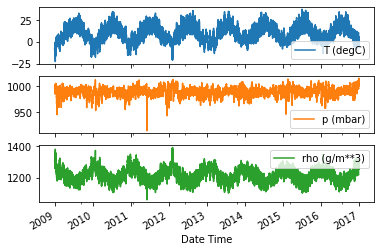

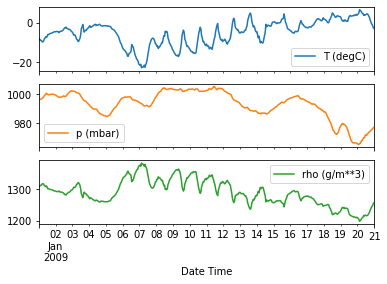

In [5]:
plot_cols = ['T (degC)','p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [7]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind velocity [m/s]')

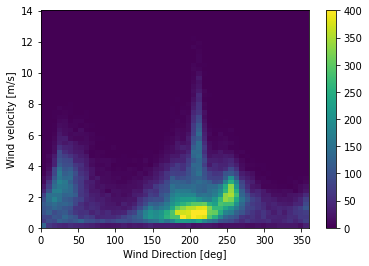

In [8]:
#kierunek wiatru (deg)
plt.hist2d(df['wd (deg)'],df['wv (m/s)'],bins=(50,50),vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind velocity [m/s]')

In [9]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

#konwersja do radianów
wd_rad = df.pop('wd (deg)')*np.pi/180

df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

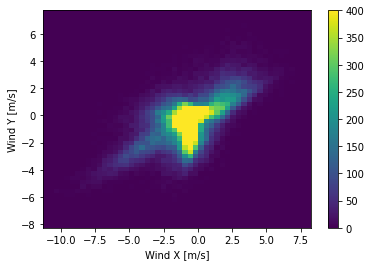

In [10]:
#rozkład wektorów wiatru
plt.hist2d(df['Wx'], df['Wy'],bins=(50,50), vmax = 400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [11]:
#wprowadzenie czasu
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [12]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s*(2*np.pi/day))
df['Day cos'] = np.cos(timestamp_s*(2*np.pi/day))
df['Year sin'] = np.sin(timestamp_s*(2*np.pi/year))
df['Year cos'] = np.cos(timestamp_s*(2*np.pi/year))

Text(0.5, 1.0, 'Dzienny sygnał [czas]')

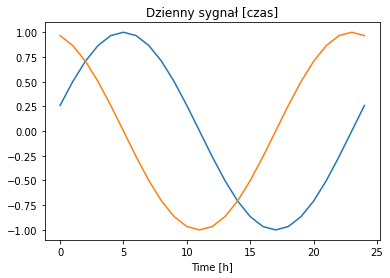

In [13]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Dzienny sygnał [czas]')

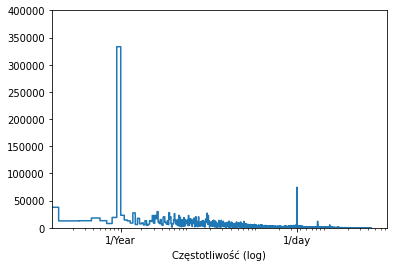

In [14]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0,len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year,np.abs(fft))
plt.xscale('log')
plt.ylim(0,400000)
plt.xlim([0.1,max(plt.xlim())])
plt.xticks([1,365.2524], labels=['1/Year','1/day'])
_ = plt.xlabel('Częstotliwość (log)')

In [15]:
#Przygotowanie danych
#podział -> 70% - trening, 20% - walidacja, 10% -test
column_indices = {name:i for i, name in enumerate(df.columns) }

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [16]:
#normalizacja danych
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df-train_mean)/train_std
val_df = (val_df-train_mean)/train_std
test_df = (test_df-train_mean)/train_std

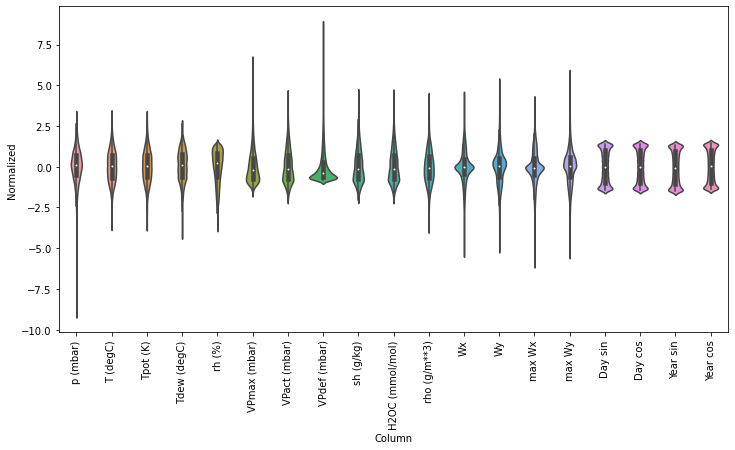

In [17]:
df_std = (df - train_mean)/train_std
df_std = df_std.melt(var_name = 'Column', value_name = 'Normalized')
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='Column', y='Normalized',data = df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [18]:
#okno danych
#indeksy i przesunięcia
class WindowGenerator:
    def __init__(self,input_width, label_width, shift, train_df = train_df, val_df = val_df, test_df = test_df, label_columns = None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name:i for i,name in enumerate(label_columns)}
        self.column_indices = {name:i for i,name in enumerate(train_df.columns)}

        #parametry okna
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0,input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start,None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column names: {self.label_columns}'
        ])

In [19]:
w1 = WindowGenerator(input_width=24,label_width=1, shift=24, label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column names: ['T (degC)']

In [20]:
w2 = WindowGenerator(input_width=6,label_width=1, shift=1, label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column names: ['T (degC)']

In [21]:
def split_window(self,features):
    inputs = features[:,self.input_slice,:]
    labels = features[:,self.labels_slice,:]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:,:,self.column_indices[name]] for name in self.label_columns],
            axis = -1
        )
    inputs.set_shape([None,self.input_width,None])
    labels.set_shape([None,self.label_width,None])
    return inputs, labels

WindowGenerator.split_window = split_window

In [22]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)
print('All shapes -> (batch,time,features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

#Partia 3 okien z 7 krokami czasowymi z 19 funkcjami dla każdego kroku
#Podział na partię 6-krotnych wejść 19-funkcyjnych z jedną etykietą
#Etykieta to 'T (degC)' wynika to definicji klasy WindowGenerator

All shapes -> (batch,time,features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


In [23]:
#wizualizacja podziału
w2.example = example_inputs, example_labels

In [24]:
def plot(self,model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12,8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots,len(inputs))
    for n in range(max_n):
        plt.subplot(max_n,1,n+1)
        plt.ylabel(f'{plot_col}[znormalizowane]')
        plt.plot(self.input_indices,inputs[n,:,plot_col_index],label='Inputs',marker='.',zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col,None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n,:,label_col_index],
                    edgecolors='k',label='Labels', c='#2ca02c',s=64)
        
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n,:,label_col_index],
                    marker='X',edgecolors='k',label='Predictions', c='#ff7f0e',s=64)
            
        if n==0:
            plt.legend()
    plt.xlabel('Time [h]')
WindowGenerator.plot = plot

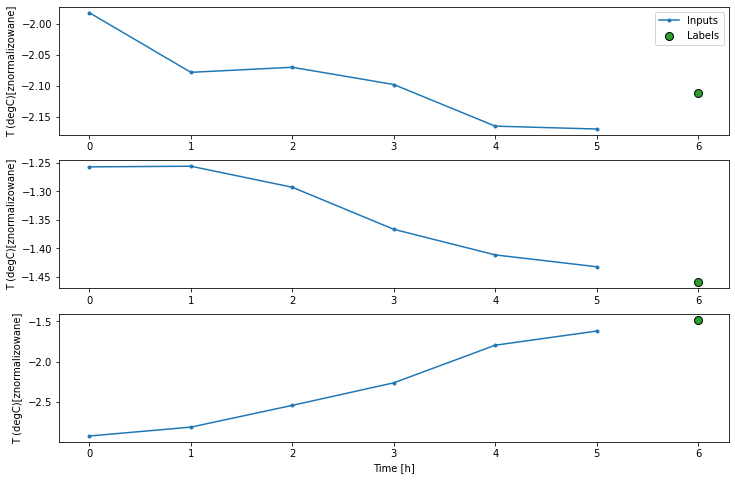

In [25]:
w2.plot()

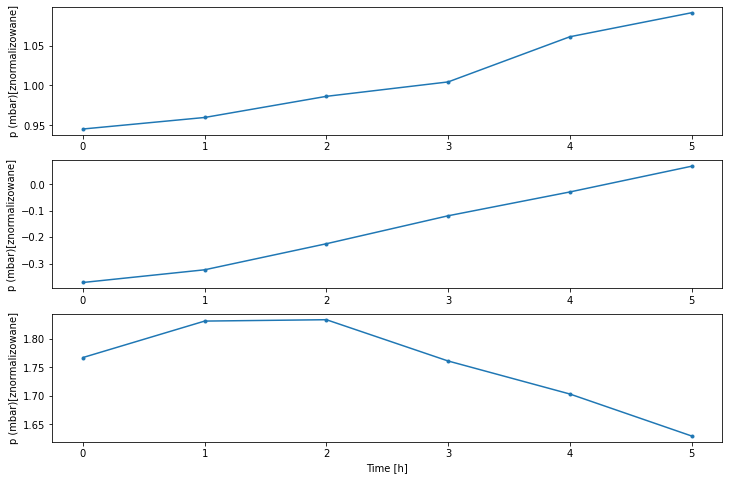

In [26]:
w2.plot(plot_col='p (mbar)')

In [27]:
#pobranie ramki DataFrame i przekształcenie jej na tf.Dataset
def make_dataset(self,data):
    data = np.array(data,dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data = data,
        targets = None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32
    )
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

In [28]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    result = getattr(self,'_example', None)
    if result is None:
        result = next(iter(self.train))
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [29]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [30]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape: {example_inputs.shape}')
    print(f'Labels shape: {example_labels.shape}')

Inputs shape: (32, 6, 19)
Labels shape: (32, 1, 1)


In [31]:
#prosty model
#konfiguracja WindowGenerator żeby generował pary jednoetapowe (input,label)

single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1, label_columns=['T (degC)']
)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column names: ['T (degC)']

In [32]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape: {example_inputs.shape}')
    print(f'Labels shape: {example_labels.shape}')

Inputs shape: (32, 1, 19)
Labels shape: (32, 1, 1)


In [33]:
#Linia bazowa -> predykcja jako wartość bez zmian...
class Baseline(tf.keras.Model):
    def __init__(self,label_index=None):
        super().__init__()
        self.label_index = label_index
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:,:,self.label_index]
        return result[:,:,tf.newaxis]

In [34]:
baseline = Baseline(label_index = column_indices['T (degC)'])
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 3s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0785


In [35]:
wide_window = WindowGenerator(
    input_width=24,label_width=24,shift=1,
    label_columns=['T (degC)']
)

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column names: ['T (degC)']

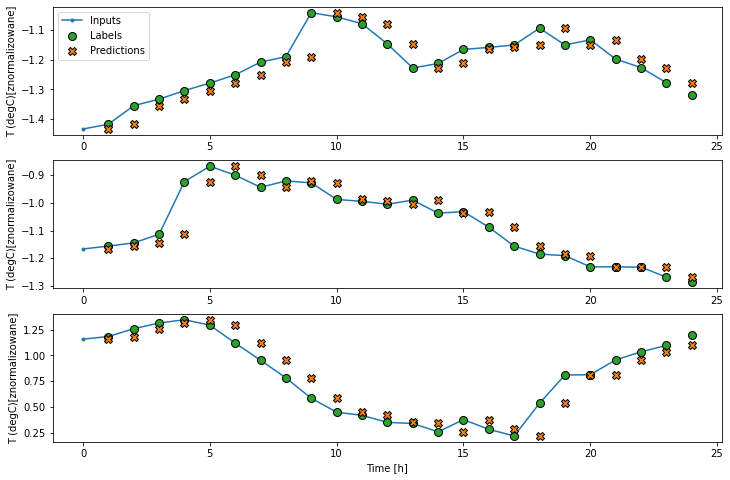

In [38]:
wide_window.plot(baseline)

In [40]:
print(f'Input shape: {wide_window.example[0].shape}')
print(f'Output shape: {baseline(wide_window.example[0]).shape}')

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [42]:
#Model liniowy -> transformacja liniowa pomiędzy danymi wejściowymi a wyjściowymi
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [43]:
print(f'Input shape: {single_step_window.example[0].shape}')
print(f'Output shape: {linear(single_step_window.example[0]).shape}')

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [47]:
MAX_EPOCHS =20
def compile_and_fit(model,window,patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=patience,
                                                       mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])
    
    history = model.fit(window.train, epochs = MAX_EPOCHS,
                        validation_data= window.val,
                        callbacks=[early_stopping])
    return history

In [48]:
history = compile_and_fit(linear,single_step_window)
val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 10s 6ms/step - loss: 0.1278 - mean_absolute_error: 0.2085 - val_loss: 0.0102 - val_mean_absolute_error: 0.0745
Epoch 2/20
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0735 - val_loss: 0.0093 - val_mean_absolute_error: 0.0709
Epoch 3/20
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0716 - val_loss: 0.0090 - val_mean_absolute_error: 0.0701
Epoch 4/20
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0707 - val_loss: 0.0089 - val_mean_absolute_error: 0.0694
Epoch 5/20
1534/1534 [==============================] - 33s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0701 - val_loss: 0.0089 - val_mean_absolute_error: 0.0695
Epoch 6/20
1534/1534 [==============================] - 56s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0699 - val_loss: 0.0087 - val_mean_absolute_error: 0.0

In [49]:
print(f'Input shape: {wide_window.example[0].shape}')
print(f'Output shape: {baseline(wide_window.example[0]).shape}')

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


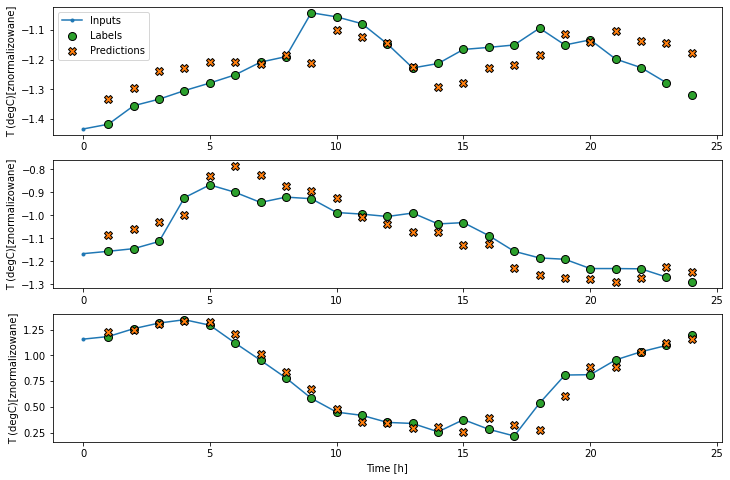

In [50]:
wide_window.plot(linear)

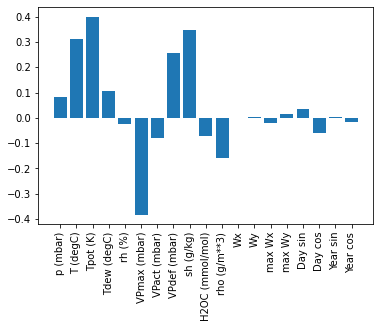

In [52]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns,rotation=90)

In [53]:
#model gęsty
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense,single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 12s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0793 - val_loss: 0.0076 - val_mean_absolute_error: 0.0626
Epoch 2/20
1534/1534 [==============================] - 10s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0645 - val_loss: 0.0082 - val_mean_absolute_error: 0.0677
Epoch 3/20
439/439 [==============================] - 2s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0653


In [54]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)']
)

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column names: ['T (degC)']

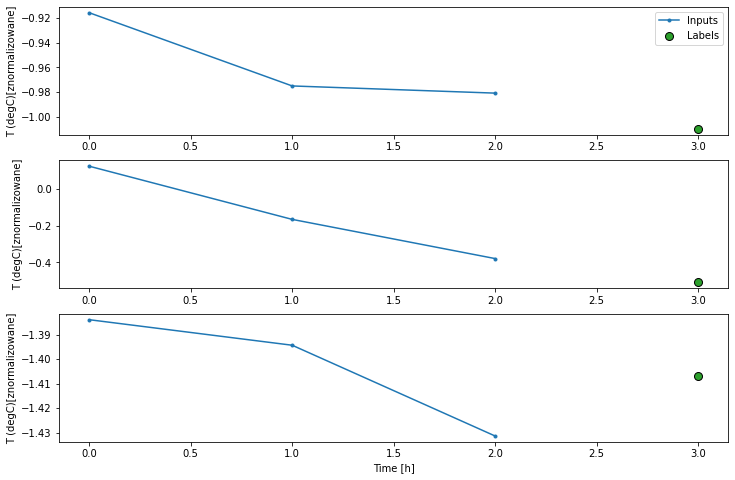

In [55]:
conv_window.plot()

In [56]:
multi_step_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Reshape([1,-1]),
])

In [57]:
print(f'Input shape: {conv_window.example[0].shape}')
print(f'Output shape: {multi_step_dense(conv_window.example[0]).shape}')

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [58]:
history = compile_and_fit(multi_step_dense,conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0592


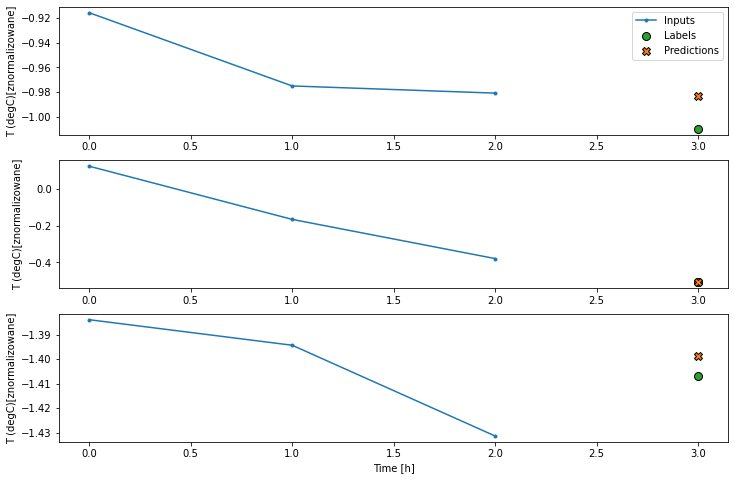

In [59]:
conv_window.plot(multi_step_dense)

In [60]:
#modele splotowe
#użycie sieci konwolucyjnych

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [61]:
print(f'Input shape: {conv_window.example[0].shape}')
print(f'Output shape: {conv_model(conv_window.example[0]).shape}')

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [62]:
history = compile_and_fit(conv_model,conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0573


In [63]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH-1)

wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)']
)

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column names: ['T (degC)']

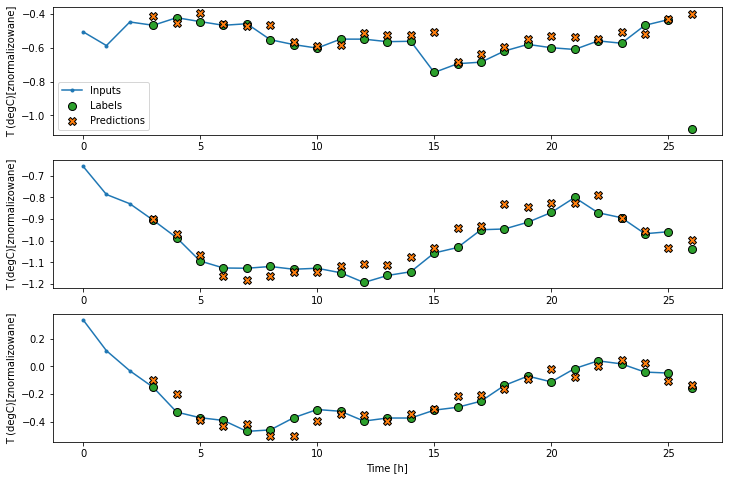

In [64]:
wide_conv_window.plot(conv_model)

In [65]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32,return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [66]:
history = compile_and_fit(lstm_model,wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test,verbose=0)

438/438 [==============================] - 3s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0519


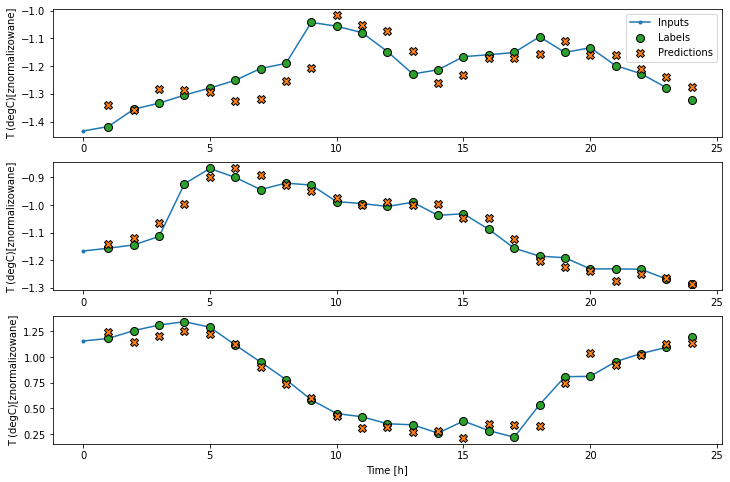

In [67]:
wide_window.plot(lstm_model)

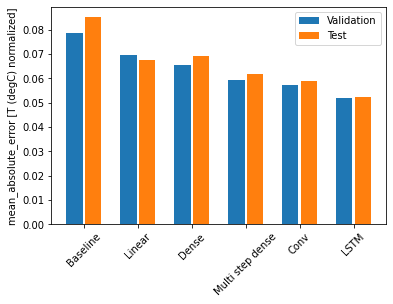

In [68]:
#wydajność modeli
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC) normalized]')
plt.bar(x-0.17,val_mae,width,label='Validation')
plt.bar(x+0.17,test_mae,width,label='Test')
plt.xticks(ticks=x, labels=performance.keys(), rotation=45)
_ = plt.legend()